<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Setting the random seed => feel free to change it and see different solutions.
np.random.seed(42)

In [5]:
# Step (activation) function: if Wx+b >= 0 then 1 otherwise 0
# Further reference: https://datascience.stackexchange.com/questions/26159/perceptron-which-step-function-to-choose
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

In [6]:
# Prediction function: receives as inputs the set of features (X), the set of weights (W) and the bias (b). The output
# is given by stepFunction().
def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

In [7]:
# This function:
# 1. receives as inputs the data X, the labels y, the weights W (as an array), and the bias b,
# 2. update the weights and bias W, b, according to the perceptron algorithm, and
# 3. return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        # y^ = step(w1x1 + w2x2 + b)
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:   # - classified, + label
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:  # + classified, - label
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

In [8]:
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations, for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 50):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))  # random weights
    b = np.random.rand(1)[0] + x_max   # random bias
    # These are the solution lines that get plotted below.
    boundary_lines = []
    
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
        
    return boundary_lines

In [10]:
# Get data and plot the points
data = pd.read_csv('./data/data.csv', header = None)
data.head()

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [11]:
# Split dataset: X - inputs points, Y - label
X = data.iloc[:, :2].values
y = data.iloc[:, -1].values

# Split inputs points
x1 = X[:, 0]
x2 = X[:, 1]

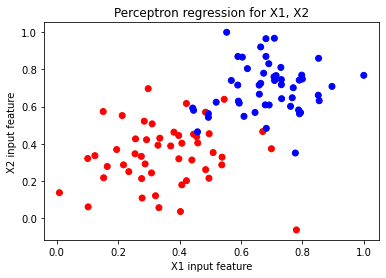

In [15]:
# Visual inspection of the dataset
color = ['red' if value == 1 else 'blue' for value in y]
plt.scatter(x1, x2, marker='o', color=color)
plt.xlabel('X1 input feature')
plt.ylabel('X2 input feature')
plt.title('Perceptron regression for X1, X2')
plt.show()

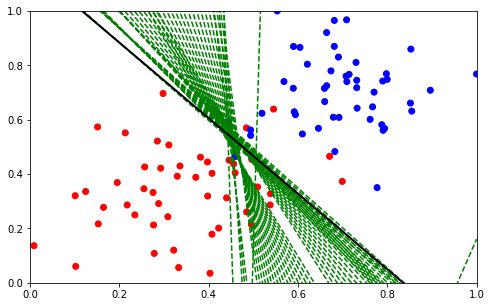

In [17]:
# Run the perceptron algorithm and get a series of boundary lines (models) for the given input and training epochs
boundary_lines = trainPerceptronAlgorithm(X, y)

x_lin = np.linspace(0, 1, 100)

# So now lets plot the lines that represent the best function for each iteration
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.scatter(x1, x2, marker='o', color=color)
for i, line in enumerate(boundary_lines):
    Θo, Θ1  = line
    if i == len(boundary_lines) - 1:
        c, ls, lw = 'k', '-', 2
    else:
        c, ls, lw = 'g', '--', 1.5
    ax.plot(x_lin, Θo * x_lin + Θ1, c=c, ls=ls, lw=lw)
    
plt.show()